In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Angels' Shepherd,2015
1,Noiva da Noite - o Desejo de 7 Homens,1974
2,To the Flame,2017
3,Cao mang die xie ji,1966
4,Funkytown,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [5]:
t = titles
c = cast

### What are the ten most common movie names of all time?

In [6]:
t.title.value_counts()[:10]

Hamlet                  19
Macbeth                 15
Carmen                  14
The Three Musketeers    12
Maya                    11
Temptation              10
Othello                 10
Anna Karenina           10
Honeymoon               10
Paradise                10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [7]:
t3 = titles[titles.year // 10 == 193]

In [8]:
t3['year'].value_counts()[:3]

1937    1186
1936    1131
1938    1121
Name: year, dtype: int64

In [19]:
titles[
    (titles.year // 10 == 193)    
].year.value_counts().head(3)

1937    1186
1936    1131
1938    1121
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

In [ ]:
# titles['decade'] = titles.year.map(lambda x: x //10 * 10)

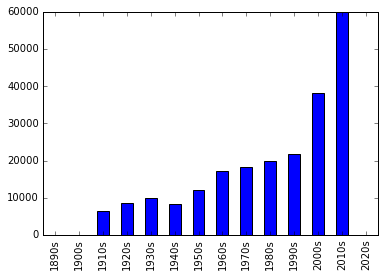

In [23]:
titles['decade'] = (titles.year // 10 * 10).astype(str) + 's'
titles.decade.value_counts().sort_index().plot(kind = 'bar')

In [9]:
titles.head()

,title,year
0,Angels' Shepherd,2015
1,Noiva da Noite - o Desejo de 7 Homens,1974
2,To the Flame,2017
3,Cao mang die xie ji,1966
4,Funkytown,2011


In [10]:
titles['decade'] = (titles.year // 10 * 10).astype(str) + 's' 
titles.head()
decades = titles.decade.value_counts()
decades

2010s    59948
2000s    38259
1990s    21839
1980s    19779
1970s    18254
1960s    17156
1950s    12235
1930s    10015
1920s     8696
1940s     8379
1910s     6418
2020s       87
1900s       37
1890s        2
Name: decade, dtype: int64

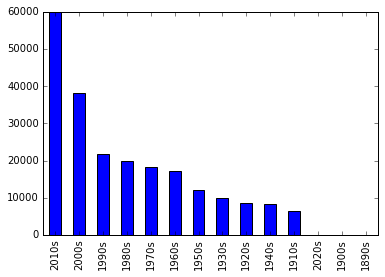

In [11]:
decades.plot(kind = 'bar')

### Plot the number of "Hamlet" films made each decade.

In [12]:
hamlet = t[t.title == 'Hamlet'].copy()

In [13]:
hamlet.loc[:, 'decade'] = (hamlet.year // 10 * 10).astype(str) + 's'

In [14]:
hamlet.decade.value_counts().sort_index()

1910s    3
1920s    1
1940s    1
1950s    1
1960s    2
1970s    2
1980s    1
1990s    2
2000s    2
2010s    4
Name: decade, dtype: int64

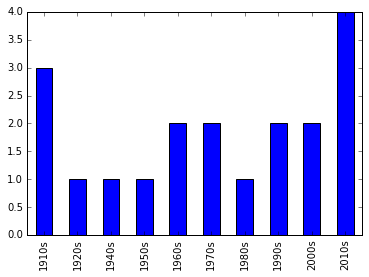

In [15]:
hamlet.decade.value_counts().sort_index().plot(kind = 'bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

In [16]:
c.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


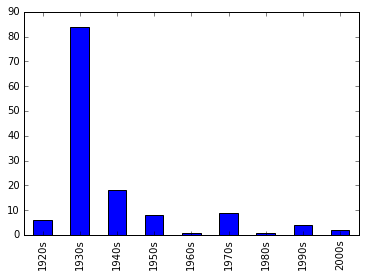

In [24]:
def chdecade(character):
    rust = c[c.character == character].copy()
    rust.loc[:,'decade'] = (rust.year // 10 * 10).astype(str) + 's'
    return rust.decade.value_counts().sort_index().plot(kind = 'bar')

chdecade("Rustler")

### Plot the number of "Hamlet" characters each decade.

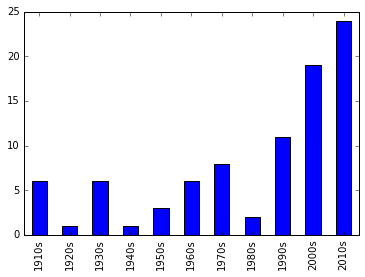

In [25]:
chdecade("Hamlet")

### What are the 11 most common character names in movie history?

In [26]:
c.character.value_counts()[:11]

Himself        18925
Dancer         11523
Extra           9805
Reporter        7836
Doctor          7104
Student         6660
Policeman       6658
Party Guest     6399
Nurse           6346
Bartender       6320
Minor Role      6094
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [27]:
c[(c.character == "Herself") & (-c.n.isnull())].name.value_counts()[:10]

Joyce Brothers         14
Leeza Gibbons           4
Sally Jessy Raphael     4
Camille Paglia          3
Whoopi Goldberg         3
Robin (II) Roberts      3
Caroline Munro          3
Kelly Lange             3
Celia Cruz              3
Roma Torre              3
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [28]:
c[(c.character == "Himself") & (-c.n.isnull())].name.value_counts()[:10]

Ron Jeremy                   18
Kurt Loder                    9
Shaquille O'Neal              8
Bob Costas                    7
Billy Graham                  7
Dick Vitale                   6
Joe Franklin                  6
Lloyd Kaufman                 6
The Bishop Don Magic Juan     6
Ed Koch                       6
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [29]:
c[c.year == 1945].name.value_counts().head()

Emmett Vogan       39
Sam (II) Harris    30
Harold Miller      29
Bess Flowers       28
Nolan Leary        27
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [30]:
c[c.year == 1985].name.value_counts().head()

Mammootty        21
Sukumari         19
Shakti Kapoor    19
Lou Scheimer     15
Mohanlal         15
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

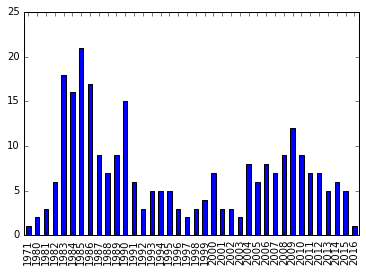

In [31]:
c[c.name == "Mammootty"].year.value_counts().sort_index().plot(kind = 'bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [32]:
c.head()


,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [33]:
pat = c[c.character.str.startswith(r'Patron in')].copy()


In [34]:
pat.character.value_counts()[:10]

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in Restaurant             3
Patron in Club                   3
Patron in cabaret                3
Patron in restaurant             3
Patron in Audience               2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [35]:
pat = c[c.character.str.startswith(r'Science')].copy()
pat.character.value_counts()[:10]


Science Teacher         56
Science Fair Student     9
Science Student          9
Science Reporter         5
Science Club Member      5
Science Fair Judge       5
Science Kid              4
Science Promo Cadet      4
Science Officer          3
Science Fair Kid         3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

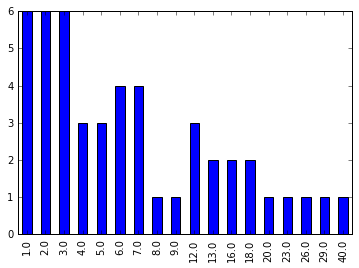

In [36]:
judi = c[c.name == 'Judi Dench'].copy()
judi.n.value_counts().sort_index().plot(kind = 'bar')


In [37]:
judi.n.value_counts()


1     6
2     6
3     6
7     4
6     4
4     3
12    3
5     3
18    2
16    2
13    2
40    1
8     1
29    1
20    1
23    1
26    1
9     1
Name: n, dtype: int64

### Plot the n-values of Cary Grant's roles through his career.

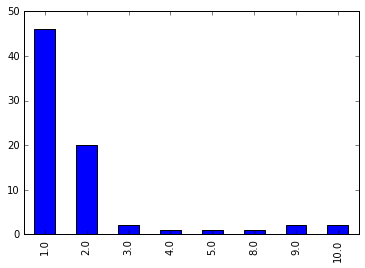

In [38]:
cary = c[c.name == 'Cary Grant'].copy()
cary.n.value_counts().sort_index().plot(kind = 'bar')


In [39]:
type(cary.n)

pandas.core.series.Series

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

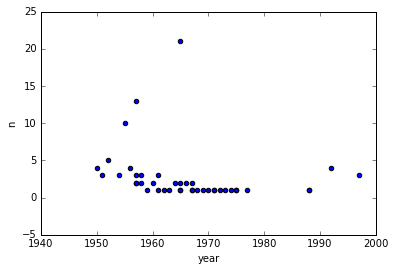

In [40]:
sid = c[c.name == 'Sidney Poitier'].sort_values(by = 'year').copy()
#sidney.n.value_counts().sort_index().plot(kind = 'bar')
sid.plot(x = 'year', y = 'n', kind = 'scatter')


### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [41]:
c[(c.year // 10 == 195) & (c.n == 1)].type.value_counts()


actor      6468
actress    2870
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [42]:
c[(c.year // 10 == 195) & (c.n == 2)].type.value_counts()


actress    4465
actor      4446
Name: type, dtype: int64

In [43]:
c[(c.year // 10 == 201) & (c.n == 1)].type.value_counts()


actor      18621
actress     8058
Name: type, dtype: int64

In [44]:
c[(c.year // 10 == 201) & (c.n != 1)].type.value_counts()

actor      585247
actress    328794
Name: type, dtype: int64